In [1]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

In [2]:
beta=3.28    # transmission rate
gamma=0.17936  # recovery rate
TS=1.0         # t_inc = TS
ND=200.0       # time_end = ND, first case comfirmed in Maricopa on January 26, 2020
S0=4484999/4485000    # initial proportion of the population that are susceptible
I0=1/4485000          # initial proportion of the population that are infectious 
INPUT = (S0, I0, 0.0) # time_start = 0.0

In [3]:
def diff_eqs(INP,t):
    '''The main set of equations'''
    Y=np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]
    Y[1] = beta * V[0] * V[1] - gamma * V[1]
    Y[2] = gamma * V[1]
    return Y   # For odeint

In [4]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

In [5]:
#RES

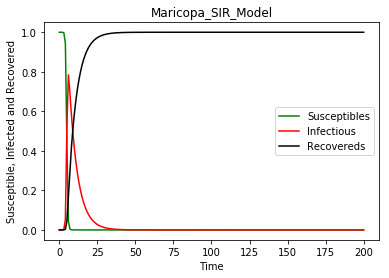

In [6]:
#Ploting
pl.subplot(111)
pl.plot(RES[:,0], '-g', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infectious')
pl.plot(RES[:,2], '-k', label='Recovereds')
pl.legend(loc=0)
pl.title('Maricopa_SIR_Model')
pl.xlabel('Time')
pl.ylabel('Susceptible, Infected and Recovered')
pl.xlabel('Time')
pl.show()